In [41]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


#2. Datensatz laden
df=pd.read_csv(r"C:\Users\goex1\Desktop\Selbst erstellte Analysen\Europameisterschaft Datensatz\matches\matches\euro\2024.csv")
print("---------------------------------------------------------------------------")

#3. Erste Übersicht von dem Datensatz anzeigen
print(df.head())
df.head(10)

#3b. Neue Variable aus bestehenden Variablen erstellen
df["score_total"]=df["home_score_total"]+df["away_score_total"]


#4. Datenbereinigung 
print("Datenbereinigung-Wie viele Null-Werte sind vorhanden?")
print(df.isnull().sum())

print("---------------------------------------------------------------------------")

#5. Deskriptive Statistiken der metrischen Variablen erstellen
print("Deskriptive Statistiken der metrischen Variablen")
df.describe()

#6. Korrelation der metrischen Variablen überprüfen
df.corr("pearson", numeric_only=True)




---------------------------------------------------------------------------
   id_match    home_team    away_team home_team_code away_team_code  \
0   2036211        Spain      England            ESP            ENG   
1   2036210  Netherlands      England            NED            ENG   
2   2036209        Spain       France            ESP            FRA   
3   2036207  Netherlands      Türkiye            NED            TUR   
4   2036208      England  Switzerland            ENG            SUI   

   home_score  away_score  home_penalty  away_penalty  home_score_total  ...  \
0         2.0         1.0           NaN           NaN               2.0  ...   
1         1.0         2.0           NaN           NaN               1.0  ...   
2         2.0         1.0           NaN           NaN               2.0  ...   
3         2.0         1.0           NaN           NaN               2.0  ...   
4         1.0         1.0           5.0           3.0               1.0  ...   

            stad

,id_match,home_score,away_score,home_penalty,away_penalty,home_score_total,away_score_total,year,utc_offset_hours,condition_humidity,condition_temperature,condition_wind_speed,match_attendance,stadium_id,stadium_capacity,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,score_total
id_match,1.000000,-0.158290,-0.041609,0.720577,0.771454,-0.116520,-0.041609,NaN,NaN,1.0,-1.0,-1.0,0.093189,0.076576,0.060153,0.072690,0.089253,NaN,NaN,-0.121603
home_score,-0.158290,1.000000,-0.086004,1.000000,0.114708,0.983931,-0.086004,NaN,NaN,-1.0,1.0,1.0,0.311652,-0.196458,0.327685,0.007850,0.221636,NaN,NaN,0.735884
away_score,-0.041609,-0.086004,1.000000,1.000000,0.114708,-0.086091,1.000000,NaN,NaN,-1.0,1.0,1.0,0.112212,-0.012210,0.137393,0.187834,0.100490,NaN,NaN,0.595895
home_penalty,0.720577,1.000000,1.000000,1.000000,0.114708,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,-0.253680,0.999625,-0.948213,-0.183111,-0.919544,NaN,NaN,1.000000
away_penalty,0.771454,0.114708,0.114708,0.114708,1.000000,0.114708,0.114708,NaN,NaN,NaN,NaN,NaN,0.931804,0.087477,0.206772,0.955599,0.284914,NaN,NaN,0.114708
home_score_total,-0.116520,0.983931,-0.086091,1.000000,0.114708,1.000000,-0.086091,NaN,NaN,-1.0,1.0,1.0,0.301696,-0.206944,0.314406,-0.009946,0.200455,NaN,NaN,0.748780
away_score_total,-0.041609,-0.086004,1.000000,1.000000,0.114708,-0.086091,1.000000,NaN,NaN,-1.0,1.0,1.0,0.112212,-0.012210,0.137393,0.187834,0.100490,NaN,NaN,0.595895
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
utc_offset_hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition_humidity,1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000,-1.000000,NaN,NaN,1.0,-1.0,-1.0,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000


---------------------------------------------------------------------------
Streudiagramm von score_total und stadium_capacity
Der Koeffizient beträgt:
[[3.32711271e-05]]
Der Y-Achsenabschnitt beträgt
[0.33720585]
Daraus folgt folgendes mathematisches Modell:
y = [0.33720585] + [[3.32711271e-05]] * x
---------------------------------------------------------------------------
Für ein Stadion mit 44000 Zuschauern ergibt sich eine Vorhersage von y = 1.8 Gesamttoren
---------------------------------------------------------------------------
Fazit: Die unabhängige Variable 'stadium_capacity' hat einen positiven Einfluss auf die Gesamtanzahl an Toren. Je höher die Stadiumkapazität war, umso mehr Tore wurden insgesamt geschossen.
--------------------------------------------------------------------------------
Modellbewertung:
Mean Squared Error (MSE): 1.60
Mean Absolute Error (MAE): 0.94
R²-Score: 0.1189


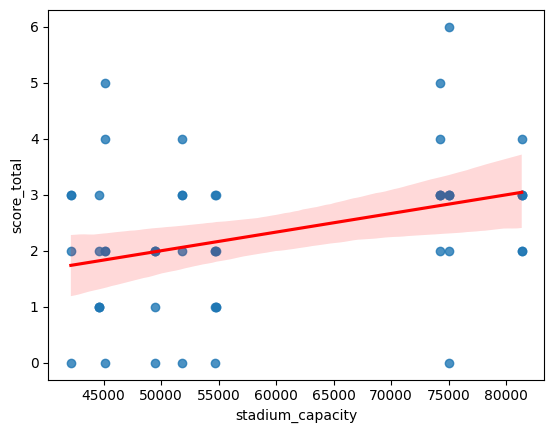

In [59]:
#7. Lineare Regression
from sklearn.linear_model import LinearRegression

y=df["score_total"]
y=df["score_total"].values.reshape(-1,1)
x=df["stadium_capacity"].values.reshape(-1,1)

clf=LinearRegression()

clf.fit(x,y)

x_values=np.linspace(0,150000).reshape(-1,1)

pred=clf.predict(x_values)


print("---------------------------------------------------------------------------")


print("Streudiagramm von score_total und stadium_capacity")
sns.regplot(data=df, x="stadium_capacity", y="score_total", line_kws={"color": "red"})


print("Der Koeffizient beträgt:")
print(clf.coef_)

print("Der Y-Achsenabschnitt beträgt")
print(clf.intercept_)


print("Daraus folgt folgendes mathematisches Modell:")

print(f"y = {clf.intercept_} + {clf.coef_} * x")

print("---------------------------------------------------------------------------")


x_eingegebener_Wert = 44000
y_predicted = clf.intercept_[0] + clf.coef_[0][0] * x_eingegebener_Wert

print(f"Für ein Stadion mit {x_eingegebener_Wert} Zuschauern ergibt sich eine Vorhersage von y = {y_predicted:.1f} Gesamttoren")

print("---------------------------------------------------------------------------")


#Interpretation
print("Fazit: Die unabhängige Variable 'stadium_capacity' hat einen positiven Einfluss auf die Gesamtanzahl an Toren. Je höher die Stadiumkapazität war, umso mehr Tore wurden insgesamt geschossen.")




from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 9. Modellgüte berechnen
y_hat = clf.predict(x)
mse = mean_squared_error(y, y_hat)
mae = mean_absolute_error(y, y_hat)
r2 = r2_score(y, y_hat)

print("--------------------------------------------------------------------------------")
print("Modellbewertung:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R²-Score: {r2:.4f}")